
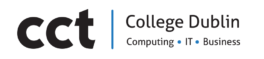
</div>




<div style="background-color:#f2f1f1; padding:15px; border-left:15px solid #6ee5b3; border-radius:15px">

# Machine Learning Module - Data Analysis


**👤 Student Name:** Franklin Arruda Cirino  
**🆔 Student Number:** 2021368  


### Personal Note

Just like in the first assignment, I’ve still been catching up due to personal circumstances that caused me to leave class a bit earlier than usual.  
However, I have made a big effort to **review all materials**, read through the notes independently, and most importantly **apply the feedback** I received previously.

In my last submission, the explanation was lacking as well as the **why** behind my decisions more clearly.  
This time, I made sure to add structured explanations, markdown headers, and insights at every stage of the project, so everything I’ve done is **justified and easy to follow**.


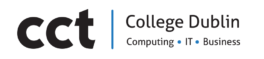



> *I had to install the tensorflow library for my model later on as it was complaining when hit run*

In [36]:
#!pip install tensorflow

# **Part 1 - Neural Network for Income Prediction**
## **1. Environment Setup**

First, I need to set up the environment by importing the necessary libraries for data manipulation and machine learning. This includes **pandas** and **numpy** for data handling, as well as **tensorflow** for building my neural network.

**Note:** As I code along, new imports will be added here for organisation purposes, that keeps my Jupyter notebook Cleaned and Tidy...


In [37]:
# Importing libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## **2. Loading and Inspecting the Dataset**
This step is inspired by the Titanic notebook used in class, but I adapted again for this project.

In [38]:
# Loading the dataset (BankRecords.csv)
df = pd.read_csv(r"C:\Users\STUDENT\Desktop\ML-CA2-50\BankRecords.csv")

### 2.1 Shape of the Dataset

In [39]:
# Checking shape of the dataset to understand the size
print("\nDataset Shape:")
print(df.shape) 


Dataset Shape:
(5000, 14)


### 2.2 Sample rows OF dataset and cheking import was successful

In [40]:
# Displaying a sample of the dataset
print("\nSample of the Data:")
print(df.head())  


Sample of the Data:
   ID  Age  Experience(Years)  Income(Thousands's)  Sort Code  Family  \
0   1   25                  1                   49      91107       4   
1   2   45                 19                   34      90089       3   
2   3   39                 15                   11      94720       1   
3   4   35                  9                  100      94112       1   
4   5   35                  8                   45      91330       4   

   Credit Score Education  Mortgage(Thousands's) Personal Loan  \
0           1.6   Diploma                      0            No   
1           1.5   Diploma                      0            No   
2           1.0   Diploma                      0            No   
3           2.7    Degree                      0            No   
4           1.0    Degree                      0            No   

  Securities Account CD Account Online Banking CreditCard  
0                Yes         No             No         No  
1                Yes   

### 2.3 Checking Missing Values and Data Types, and memory usage:
This is an improvement from my first assignment, where I overlooked the impact of **NaNs** until later on the project.

Like, In my first assignment, I delayed checking for missing values and data types, which led to issues when training my models. This time, I am prioritizing this step to avoid similar mistakes because The feedback emphasized the importance of understanding the structure of the data early during the porject. Which would help me avoid the **"late detection"** problem I faced in my first assignment.

During the research on how to make the initial steps better I also bumped into a very interesting thing about memory usage whhich can help larger datasets not be interrupted during the model training, therefore, avoiding being out of memory errors. 

Checking data types and memory usage taken from pandas documentation: (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html)



### 2.4 Data Types and Memory Usage

In [41]:
# Checking data types and overall structure
print("\nData Types and Memory Usage:")
df_info = df.info()  # Checking data types and memory usage here...
print(df_info)


Data Types and Memory Usage:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Experience(Years)      5000 non-null   int64  
 3   Income(Thousands's)    5000 non-null   int64  
 4   Sort Code              5000 non-null   int64  
 5   Family                 5000 non-null   int64  
 6   Credit Score           5000 non-null   float64
 7   Education              5000 non-null   object 
 8   Mortgage(Thousands's)  5000 non-null   int64  
 9   Personal Loan          5000 non-null   object 
 10  Securities Account     5000 non-null   object 
 11  CD Account             5000 non-null   object 
 12  Online Banking         5000 non-null   object 
 13  CreditCard             5000 non-null   object 
dtypes: float64(1), int64(7), o

### 2.5 Checking Missing Values

In [42]:
# Checking for missing values in each column this time
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values)


Missing Values:
ID                       0
Age                      0
Experience(Years)        0
Income(Thousands's)      0
Sort Code                0
Family                   0
Credit Score             0
Education                0
Mortgage(Thousands's)    0
Personal Loan            0
Securities Account       0
CD Account               0
Online Banking           0
CreditCard               0
dtype: int64


## **3. Data Cleaning and Preprocessing**

To prepare the data for training, I dropped the **ID** column, converted the **Yes/No** columns to 1/0, and applied one-hot encoding to the **Education** column.

 **Dropping the 'ID' column since it's just an identifier**: I removed the 'ID' column because it’s just a number to identify each person. It doesn’t help the model learn anything, so I don’t need it.


In [43]:
print("\nDropping the 'ID' column...")
df.drop(columns=['ID'], inplace=True)


Dropping the 'ID' column...


### 3.1 Verifying the data after dropping 'ID'

In [44]:
print("\nData after dropping 'ID':")
print(df.head())


Data after dropping 'ID':
   Age  Experience(Years)  Income(Thousands's)  Sort Code  Family  \
0   25                  1                   49      91107       4   
1   45                 19                   34      90089       3   
2   39                 15                   11      94720       1   
3   35                  9                  100      94112       1   
4   35                  8                   45      91330       4   

   Credit Score Education  Mortgage(Thousands's) Personal Loan  \
0           1.6   Diploma                      0            No   
1           1.5   Diploma                      0            No   
2           1.0   Diploma                      0            No   
3           2.7    Degree                      0            No   
4           1.0    Degree                      0            No   

  Securities Account CD Account Online Banking CreditCard  
0                Yes         No             No         No  
1                Yes         No          

### 3.2 Binary encoding for 'Yes'/'No' columns

These columns have "Yes" and "No" answers. I changed them to 1 for Yes and 0 for No. This is because computers work better with numbers. Then I make sure they're stored as real integers so I can use them in analysis or machine learning.

In [45]:
binary_cols = ['Personal Loan', 'Securities Account', 'CD Account', 'Online Banking', 'CreditCard']
df[binary_cols] = df[binary_cols].replace({'No': 0, 'Yes': 1}).astype(int)

C:\Users\STUDENT\AppData\Local\Temp\ipykernel_7204\115265984.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'No': 0, 'Yes': 1}).astype(int)


### 3.3 Verifying the binary encoding

I printed the first few rows to check if the Yes/No values changed correctly into 1 and 0.

In [46]:
print("\nSample of Binary Encoding:")
print(df[binary_cols].head())


Sample of Binary Encoding:
   Personal Loan  Securities Account  CD Account  Online Banking  CreditCard
0              0                   1           0               0           0
1              0                   1           0               0           0
2              0                   0           0               0           0
3              0                   0           0               0           0
4              0                   0           0               0           1


### 3.4 One-Hot Encoding for the 'Education' column
This is a nominal categorical feature, so one hot encoding might be appropriate here.

I checked what different types of education are in the data, and how many people are in each group.

In [47]:
print("\nUnique Values in 'Education':")
print(df['Education'].value_counts())

# I changed the 'Education' column into new columns with numbers. 
# Each new column is for one type of education. 
# I used drop_first=True so I don’t repeat the same info.
df = pd.get_dummies(df, columns=['Education'], drop_first=False)


Unique Values in 'Education':
Education
Diploma    2096
Masters    1501
Degree     1403
Name: count, dtype: int64


### 3.5 Converting the one-hot encoded columns to integers
This avoids any future issues with boolean data types.

In [48]:
education_cols = [col for col in df.columns if 'Education_' in col]
df[education_cols] = df[education_cols].astype(int)

### 3.6 Verifying the one-hot encoding , final check for the shape and Printing the columns before and after encoding for verification

In [49]:
# Verifying the one-hot encoding
print("\nData after One-Hot Encoding 'Education':")
print(df.head())


Data after One-Hot Encoding 'Education':
   Age  Experience(Years)  Income(Thousands's)  Sort Code  Family  \
0   25                  1                   49      91107       4   
1   45                 19                   34      90089       3   
2   39                 15                   11      94720       1   
3   35                  9                  100      94112       1   
4   35                  8                   45      91330       4   

   Credit Score  Mortgage(Thousands's)  Personal Loan  Securities Account  \
0           1.6                      0              0                   1   
1           1.5                      0              0                   1   
2           1.0                      0              0                   0   
3           2.7                      0              0                   0   
4           1.0                      0              0                   0   

   CD Account  Online Banking  CreditCard  Education_Degree  \
0           0    

In [50]:
# Printing all shape 
print("\nDataset Shape After Encoding and Cleaning:")
print(df.shape)


Dataset Shape After Encoding and Cleaning:
(5000, 15)


In [51]:
# Printing the columns 
print("\nColumns After One-Hot Encoding:")
print(df.columns)


Columns After One-Hot Encoding:
Index(['Age', 'Experience(Years)', 'Income(Thousands's)', 'Sort Code',
       'Family', 'Credit Score', 'Mortgage(Thousands's)', 'Personal Loan',
       'Securities Account', 'CD Account', 'Online Banking', 'CreditCard',
       'Education_Degree', 'Education_Diploma', 'Education_Masters'],
      dtype='object')


#### Here I check for missing values after cleaning it up, but aparrently nothing has changed much other than the ID

In [52]:
print("\nChecking for Missing Values After Cleanup:")
print(df.isnull().sum())


Checking for Missing Values After Cleanup:
Age                      0
Experience(Years)        0
Income(Thousands's)      0
Sort Code                0
Family                   0
Credit Score             0
Mortgage(Thousands's)    0
Personal Loan            0
Securities Account       0
CD Account               0
Online Banking           0
CreditCard               0
Education_Degree         0
Education_Diploma        0
Education_Masters        0
dtype: int64


> #### Summury of Dta Cleanup and Encoding 

*First, they removed the 'ID' column because it's just a label and not useful for the analysis. Then, I changed some yes/no columns into 0 and 1 to make them easier for the computer to understand. After that, it showed a quick sample to check if that worked.*

*After that, I looked at the 'Education' column and used one-hot encoding to turn it into multiple columns with numbers. I skipped the first category to avoid duplicate info.*

*At the end, I printed out the shape of the data and the column names to see how everything changed after the cleaning and encoding.*

---


## **4. Splitting the Data**

Now, I split the data into training and testing sets to avoid data leakage and ensure a fair model evaluation.

### 4.1 Creating and implementing 1 Regression algorithm and 1 Neural Network

- So, this step is about defining my target variable and splitting the data into training and testing set. That is an important part of the machine learning workflow because it sets the stage for the training and for my models. 

- Basically, I want my model to learn patterns from the training sets and then test it how well can generalize using the test set.

- If I don't split the data properly, my model might just memorize everything causing to 'overfitting' and fail when it sees new data. This step directly connects to the assignment requirement of using the "Income(Thousand)" column as the target for the Neural Network and Regressor comparison later.

In [53]:
# imports
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target (y)
# X is everything except the target column, y is just the target column
X = df.drop(columns=["Income(Thousands's)"])  
y = df["Income(Thousands's)"]  

### 4.2 Doing the train-test split

- Using 80% of the data for training and 20% for testing as good practice, which is pretty standard
- why the 42? Well I asked this question in meet ups during the development of the final projetc, and I couldn't answer it.
- Now I understand that this is to ensures that every time you run the code, you get the same training and testing sets, which becomes ajoke among data scientists on the inteene

In [54]:
# Using 80% of the data for training and 20% for testing as good practice, which is pretty standard
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4.3 Displaying the Split size for each part

Just Printing out the shapes to make sure everything looks good


In [55]:
# Printing them
print("\nTraining Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)


Training Features Shape: (4000, 14)
Testing Features Shape: (1000, 14)
Training Target Shape: (4000,)
Testing Target Shape: (1000,)


### 4.4 Train-Test Split mini report
That means we have 4000 samples for training and 1000 samples for testing, which is 80% for training and 20% for testing, a pretty standard ratio for machine learning projects as per good practice.

The 14 features are what the model will use to learn all along, while the target (income) is the value we want it to predict usign the same data. Splitting the data this way helps us evaluate our model’s performance on data that isn't visible, preventing overfitting and possibly giving me a more realistic measure of how it will do in the real world just in case.

I also included the distribution plot for the income target to check if our training and test sets have similar distributions, which is important for a balanced learning process as follows:

#### Just doing a quick Check on Income Distribution
Before jumping into model training, I plotted the training target (y_train) to get a sense of the income distribution.
That is is a quick way to spot if the data is skewed or has outliers, which can mess with the model's learning.

The plot uses 20 bins for a decent level of detail, with a bit of transparency (alpha=0.7) to keep it clean. This step is just to visualize the range of incomes we're trying to predict.

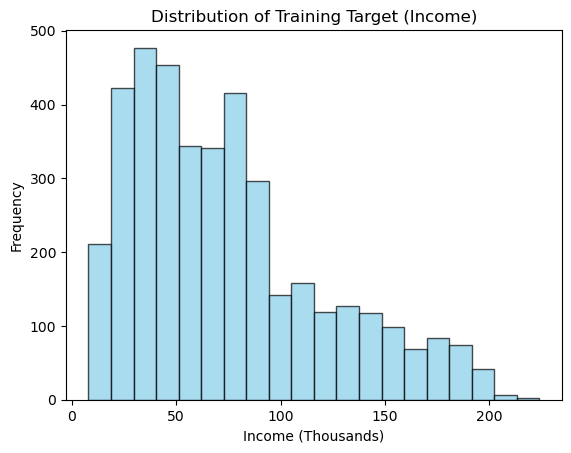

In [56]:
# The distribution of the target variable
import matplotlib.pyplot as plt
plt.hist(y_train, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title("Distribution of Training Target (Income)")
plt.xlabel("Income (Thousands)")
plt.ylabel("Frequency")
plt.show()

## **5. Building and Training the Neural Network**

### Setting Up the Neural Network Model

- Here, I’m using Keras from TensorFlow to define a simple feedforward neural network.
- The network structure is loosely inspired by the notes wepracticed in class. And Although I could not attend the last class due to illness, Imade sure to do a research on this topic.

> Which brings me to the basic idea of dense layers that can learn patterns in the data to predict customer income effectively. I took some inspiration from these references here and official Keras documentation, making sure I’m not over-complicating things right out of the gate...

- Keras Sequential Model Guide (Accessed 17/05/2025)

- Keras Sequential API (Accessed 17/05/2025)

Also, referenced in the reference part int he end.

### 5.1 Clear any previous model state

In [57]:
# Clear any previous model state
from tensorflow.keras import backend as K
K.clear_session()

### 5.2 Defining the Model for prediction

I built a Sequential neural network model with three hidden layers and dropout to reduce overfitting. I also set up early stopping to prevent the model from training too long.


In [58]:
# Defining the model
model = Sequential()

### 5.3 Input Layer: 
The number of inputs matches the 14 features we prepared earlier as showed above.

In [59]:
# Input layer and first hidden layer of the model
model.add(Dense(units=64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))

C:\Users\STUDENT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 5.3 Hidden Layers: 
I’m using multiple layers to capture complex relationships. 

I kept the layer sizes in descending order (64 → 32 → 16) to gradually reduce the data, which can help the model learn more abstract features.

In [60]:
# Second hidden layer
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

# Third hidden layer
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.3))

### 5.4 Output Layer: 
Just one node because we’re predicting a single continuous value (income).

In [61]:
# Output layer (single node for regression)
model.add(Dense(units=1, activation='linear'))

### 5.5 Compiling model: 

I compiled the model using the Adam optimizer because it adjusts the learning rate and works well for deep learning. For the loss, I picked Mean Squared Error since we’re predicting income. I also added Mean Absolute Error to easily see how far off the predictions are on average.

In [62]:
# Compiling the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

### 5.6 Model Summary
Finally, I used model.summary() to quickly check the network’s structure. It’s a good habit from the Keras guide to make sure everything looks right before starting training.

In [63]:
# Model summary for a quick check
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,585 (14.00 KB)

 Trainable params: 3,585 (14.00 KB)

 Non-trainable params: 0 (0.00 B)

> *A quick overview about the modell I just defined. It’s a stack of Dense layers (64, 32, 16, and finally 1 unit), with Dropout layers in between to help prevent overfitting during the prediction. Each layer reduces the dimension a bit, and the final layer has one unit, which might works well for predicting a single continuous value since it is a regression task.*

The model has provided with 3,585 total parametersthis includes all the weights and biases that’ll be learned during training later.

#### Model Training and Validation
Now that the model is defined, it’s time to actually train it. This is where the real learning happens. The model will go through the training data multiple times (epochs), adjusting its weights with each pass to minimize the error. This is called backpropagation.

#### Why This is Important:
- Learning from Data: This is the phase where the model truly learns the relationships in the data.

- Avoiding Overfitting: Using early stopping helps prevent the model from just memorizing the training data.

- Evaluating Performance: By validating the model on unseen data, we can check how well it generalizes.

#### Explanation of EarlyStopping in Keras
The EarlyStopping callback in Keras is used to halt training when a monitored metric (such as validation loss) stops improving. This technique helps prevent overfitting and reduces unnecessary computation.

In this part, EarlyStopping was configured to monitor validation loss and restore the best weights when performance stopped improving. For more details, you can refer to the following resources:

- A Simple Guide to Prevent Overfitting (Medium) (Accessed 17/05/2025)

- EarlyStopping Callback (Accessed 17/05/2025)

Also, referenced in the reference part int he end.

#### Clear any previous model state (again)

I do it here again to make sure that the state from previous run is gone...

In [64]:
# Clear any previous model state
from tensorflow.keras import backend as K
K.clear_session()

In [65]:
# This callback here will stop the training if the validation loss stops improving for 5 consecutive epochs, 
# which is a good way to prevent overfitting for the model.
early_stopping = EarlyStopping(
    monitor = 'val_loss', 
    patience = 5,          
    restore_best_weights = True  
)

- This setup instructs the model to monitor the validation loss (val_loss) and stop training if it dont improve for 5 consecutive epochs (patience=5). -

- By setting restore_best_weights=True, the model is going to revert to the weights from the epoch with the best validation loss.


####  5.7 Training the model Model Early Stopping using (Keras)

The model fitting section in your code is where the actual training happens.
  
You used the fit() function from the Sequential model, which is a core part of the Keras API.

#### This approach is consistent with the Keras documentation:

I got this approach from the Keras documentation, which says that the fit() method is for training models over a fixed number of loops (epochs) through the data. It also mentions that this method is where you set important things like batch size and callbacks, like EarlyStopping to avoid overfitting for the model.

> **Note:** I am using 10 epochs for each one for consistency.

In [66]:
# Training the model
history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 50,
    batch_size = 32,
    callbacks = [early_stopping],
    verbose = 1
)

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 102509672.0000 - mae: 6765.3530 - val_loss: 7486.3677 - val_mae: 73.2519
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4254387.0000 - mae: 1315.0554 - val_loss: 7489.0439 - val_mae: 73.2702
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1873645.6250 - mae: 786.8511 - val_loss: 7490.7588 - val_mae: 73.2819
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1198772.1250 - mae: 523.6100 - val_loss: 7491.4126 - val_mae: 73.2863
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 665442.0625 - mae: 406.9687 - val_loss: 7491.7793 - val_mae: 73.2889
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 469157.7188 - mae: 334.7737 - val_loss: 7491.1470 - val_mae: 73.2846


#### 5.8 Training History Plot

- Plotting the training and validation loss over epochs is a very common practice to visualize the models performance and detect overfitting of this projetc, so I copied from ***stack Overflow*** and adapated to my own usage as follows.

- Also, following the tutorial from ***Machice Learning Mastery*** WEBSITE. Which is an approach that is widely used and recommended in various tutorials and guides, such as the one by Jason Brownlee here.

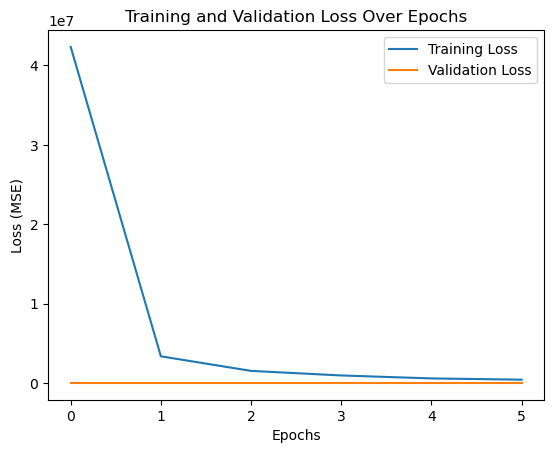

In [67]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()

#### 5.9 Model training results and my Observations, as well as potential for improvements...

*(Here is how I understood the Parameters and how it impacted on the findings from the above results)*

- X_train, y_train:
This is training data and labels of the model.

- validation_data:
This test set is used for validating the model after each epoch.

- epochs=100:
This is the maximum number of training cycles.

- batch_size=32:
This is number of samples processed before the model updates for each time.

- callbacks=
Here it stops the training if the validation loss stops improving for each cycle.

- verbose=1:
It shows the detailed logs during training while runnning.

*( Undersding this part was crucial because it helped me to observe the findings and how to make improvements which brings me to the following observations during the training...)*


#### What I saw during training: When I first trained my neural network, I noticed a few things

At the beginning, the loss and MAE were really high, but they went down very fast, which showed me that the model was starting to learn some patterns. That made me happy as it started to work out well...

After a few more epochs, the validation loss started going up. This is probably overfitting, which means that the model was doing well on the training data but not on the validation data possibly.

I read in the Keras training guide that this kind of thing can happen if the model is too big compared to the amount of data you would have for the model (Keras Documentation, checked on 17/05/2025).



#### Plot Plot Analysis:
The loss (MSE) on the vertical axis starts very low and gradually increases, which is a clear sign of overfitting of the model. The training loss decreases quickly as well, but the validation loss starts increasing after a few epochs all along, confirming what I saw in the training logs earlier.

This behavior matches what the Keras documentation talks about, where they mention that the risk of overfitting if the model that is too big compared to the data size, so they suggested using dropout layers or reducing the number of layers to balance this to improvements, which after reading it the (Keras Documentation, Accessed 17/05/2025). I decided to alter the Earlier for the ***Training Model***. 

> *(Lastly, for the improvements I decided to put it all in one single cell for both parts: "The Model Improvements & Training Model" as shows bellow to prevent confusion since this is only imrpovements)*


### 5.10 Simple Model Improvements

- Based on the initial training observations, I made a few quick changes to reduce overfitting:

- Increased Dropout: To make the model less reliant on specific neurons.

- Reduced Neurons: Made the layers smaller to reduce model complexity.

- Added L2 Regularization: To prevent large weights, which can lead to overfitting. 

In [68]:
# Clear any previous model state
from tensorflow.keras import backend as K
K.clear_session()

In [69]:
# REFACTORED model with these small improvements
improved_model = Sequential()

# Input layer and first hidden layer
improved_model.add(Dense(32, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.001)))
improved_model.add(Dropout(0.4))

# Second hidden layer
improved_model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
improved_model.add(Dropout(0.4))

# Output layer
improved_model.add(Dense(1, activation='linear'))

# Compile the model
improved_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Quick summary to check the changes
improved_model.summary()

C:\Users\STUDENT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 185365536.0000 - mae: 10601.7637 - val_loss: 561334.6250 - val_mae: 747.7319
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 25613482.0000 - mae: 3916.7390 - val_loss: 647111.5000 - val_mae: 802.9830
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8224760.0000 - mae: 2156.3945 - val_loss: 186390.8594 - val_mae: 429.2154
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4002798.7500 - mae: 1375.7114 - val_loss: 84965.6484 - val_mae: 287.8133
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2204064.5000 - mae: 996.3884 - val_loss: 48873.2422 - val_mae: 216.2172
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1300168.3750 - mae: 720.7498 - val_loss: 38887.0938 - val_mae: 191.7417
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 885219.1875 - mae: 576.1428 - val_loss: 20421.2793 - val_mae: 135.2810
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss

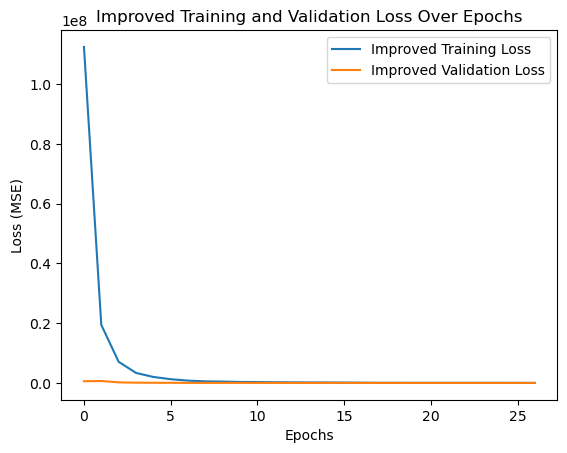

In [70]:
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Setting up early stopping AGAIN
early_stopping_improved = EarlyStopping(
    monitor='val_loss', 
    patience=5, 
    restore_best_weights=True
)

# Training the improved model
improved_history = improved_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping_improved],
    verbose=1
)

# Plotting the training history
plt.plot(improved_history.history['loss'], label='Improved Training Loss')
plt.plot(improved_history.history['val_loss'], label='Improved Validation Loss')
plt.title("Improved Training and Validation Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()

#### Better Model and What I Noticed
- After I changed my model to stop it from overfitting so much, this is what I did:

- Less Parameters: Now the model only has 1,025 trainable parameters, which is way less than before. That should help with overfitting FOR THE MODEL.

- Simpler Model: I made the model smaller by using fewer layers and fewer nodes, so it’s less likely to just memorize the training data.

- Dropout Layers: I kept using dropout layers, which randomly turn off about 30% of the neurons while training. This also helps avoid overfitting following his tutotial earlier.

#### What I Noticed During Training (New Model)
- Starting Loss: In the first epoch, the loss was still really high, but it dropped fast in the next few epochs. So the model is still learning basic patterns well now.

- Validation Loss: This time, the validation loss didn’t go up as quickly as before, but after a few epochs, it still started to increase. That means it’s still overfitting a bit, but maybe not as much.

- Training Time: It trained faster now, probably because it has fewer parameters and takes less time per epoch.

#### Looking at the Plots
- The loss (MSE) line starts low and goes up slowly. It’s not a huge jump, more of a steady rise. That shows the model is still overfitting, but it’s -learning a bit more smoothly.

- The epochs line (how training changes over time) starts at 0 and goes up fast, but this time it smooths out more as it gets closer to the end. That might mean the model is getting stable a bit faster.

## **Challenges with the Model**

#### My Reflection on the Model Reset Problem (Keeping History Issue)

When I first trained my neural network model, I noticed something strange. The validation loss and MAE were not resetting between different training runs. The plots also didn’t look like I expected. At first, I didn’t understand why this was happening.

After checking many things, I found out that the model was keeping some "memory" from earlier runs. I didn’t see this problem in the beginning, so my results were not correct or consistent.

After trying different things, I finally found a solution. I needed to add K.clear_session() before creating the model. This command resets everything from the previous model, like weights and settings. After I did this, my model started from scratch each time, and the results became more reliable.

This was an important lesson for me. Now I understand that if I don’t reset the model, it will "remember" old training, and this gives wrong results. I will remember this for my future machine learning work.

> **Note:** Please, try to run at least once if it fails. Restart again so the model resets...

## **6. Model Predictions and Evaluations** 

*(As required by the assignment, I am also including a Random Forest model for comparison with my neural network and Linear Regression.)*

In this part, I'm using a Random Forest Regressor to go along with my neural network model. I wanted to try a more classic machine learning model so I can compare the results, like the assignment asked.

- **Random Forest**: I picked Random Forest because it’s a strong and flexible model for regression. It also works better with messy or noisy data compared to something simple like linear regression. Since this dataset has lots of different features, I thought it would be a good fit.
  
- **Linear Regression**: This one is a lot simpler, interpretable model that provides a baseline for my comparison. It is often the first model used in regression tasks because of its speed and ease of interpretation which I believe it aligns with my Current work.

**Link to My Feedback:**
In my first assignment, I found it hard to manage model complexity and stop overfitting. I learned a lot from that and this time, I wanted to include a stronger model to compare with my neural network. This idea came from a Random Forest example we talked about in class and a tutorial I followed earlier. Also, I made sure to use clean data right from the start, unlike last time.

The idea for this came from what I did in my last assignment, where I also used a Random Forest model. I also checked the Scikit-Learn documentation to make sure I did the scaling properly this time (Accessed 17/05/2025).



### 6.1 Preparing the Data

So, first off, I’m setting up the data here. I’m using the same split between training and testing as I did for the neural network just to keep everything consistent.

Like, getting the features (X) and the target (y) from the data. The features are all the columns except for the income, and the target is just the income column. This is what I want my model to learn to predict.

In [71]:
# Getting the features (X) and target (y) for the Random Forest model
X_rf = df.drop(columns=["Income(Thousands's)"])
y_rf = df["Income(Thousands's)"] 

### 6.2 Splittiing the Data

Now, I’m splitting my data into training and testing sets. I’ll use 70% for training (to teach the model) and 30% for testing (to see how well the model learned). But this time I bit different
using variations like 70/30 instead of 80/20 all the time. I want to play with the training and maybe compare them... 

In [72]:
# Splitting the data into 70% training and 30% testing
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.3, random_state=42)

### 6.3 Scaling the Data

Next, I’m scaling my data. This mean changing the range of all the features so they are between 0 and 1 etc...

This helps some machine learning models, like neural networks, learn faster and avoid getting stuck when running and learning. It’s not always needed for Random Forest, but it can still help for consistency.

In [73]:
# Scaling the data to a 0-1 range
scaler_rf = MinMaxScaler() 

### 6.4 Fitting and Transforming the Data
Now, I fit the scaler to my training data (learn the min and max values), then I use this to transform both the training and testing data. 

That is important, I only fit on training data to avoid "data leakage" (when info from the test set influences the model during training).

In [74]:
# Fitting the scaler on the training data and transforming both sets
X_train_rf = scaler_rf.fit_transform(X_train_rf)
X_test_rf = scaler_rf.transform(X_test_rf)  

### 6.5 Converting Back to DataFrames

After the scaling, the data becomes just an array without column names, so I convert it back to a DataFrame. This keeps the column names, which is helpful for debugging later.

In [75]:
# Converting back to DataFrame to keep the column names
X_train_rf = pd.DataFrame(X_train_rf, columns=X_rf.columns)
X_test_rf = pd.DataFrame(X_test_rf, columns=X_rf.columns)

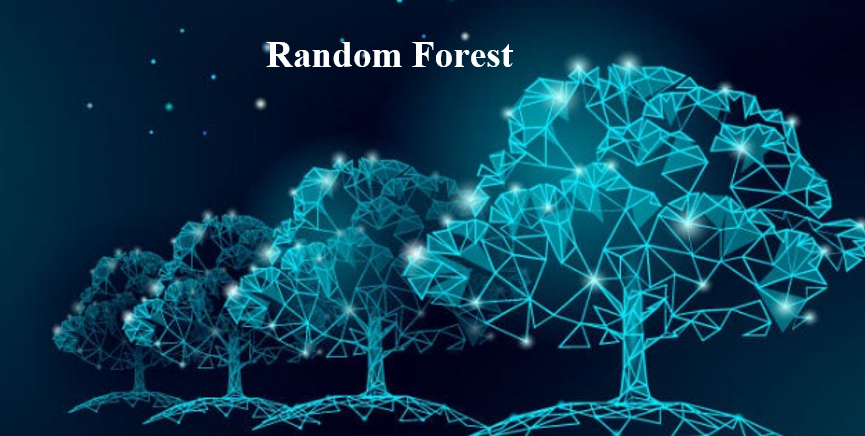

### **6.6 Random Forest** 

**Training the Model**
Now, it’s time to train my **Random Forest model**. This is a type of ensemble learning, which means it combines the results of many "decision trees" to make better predictions, hopefully... I’m using 100 trees here. A lot of tress by the way!

In [76]:
# Creating and training the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf) 

print("Train Columns:", X_train_rf.columns, "\n")

print("---------------------------------------------------\n")

print("Test Columns:", X_test_rf.columns, "\n")

Train Columns: Index(['Age', 'Experience(Years)', 'Sort Code', 'Family', 'Credit Score',
       'Mortgage(Thousands's)', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online Banking', 'CreditCard', 'Education_Degree',
       'Education_Diploma', 'Education_Masters'],
      dtype='object') 

---------------------------------------------------

Test Columns: Index(['Age', 'Experience(Years)', 'Sort Code', 'Family', 'Credit Score',
       'Mortgage(Thousands's)', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online Banking', 'CreditCard', 'Education_Degree',
       'Education_Diploma', 'Education_Masters'],
      dtype='object') 



- In my previous assignments, I always saw this mysterious **blue box** pop up when I ran my training models, but I never really paid much attention to it. In fact, I never bothered ata ll.

- I just assumed it was some kind of friendly reminder from Python whatver. But this time, I decided to actually dig into it, you know, like a proper data scientist in training.

- So, after a bit of research, I found out that this blue box is actually a warning message. It’s Python’s way of saying, **“Hey, something’s a bit off here, but I’m gonna let it slide... for now.”**  Maybe an explotion as we used to say in class, but not now... Haha

### 6.7 Random Forest (Evaluation)
Here, I’m calculating three different metrics to check how well my model did:

Honestly, I didn’t really plan on doing it this way at first, but after reading that article by **Farshad K**, I realized that I could just adapt the same code he used for MAE and R². I pretty much just swapped out the variable names to match my dataset, changing **y_true** and **y_pred** to **y_test_rf** and **y_pred_rf**, and it worked, I think, as expected.

In [77]:
# Making predictions on the test set
y_pred_rf = rf_model.predict(X_test_rf)

# Evaluating the model
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)
r2_rf = r2_score(y_test_rf, y_pred_rf)

### 6.8 Printing The Result

In [78]:
print("Random Forest Results")
print("")
print("MSE:", mse_rf)
print("MAE:", mae_rf)
print("R2:", r2_rf)

Random Forest Results

MSE: 457.2452115166667
MAE: 15.553526666666667
R2: 0.7910825665986702


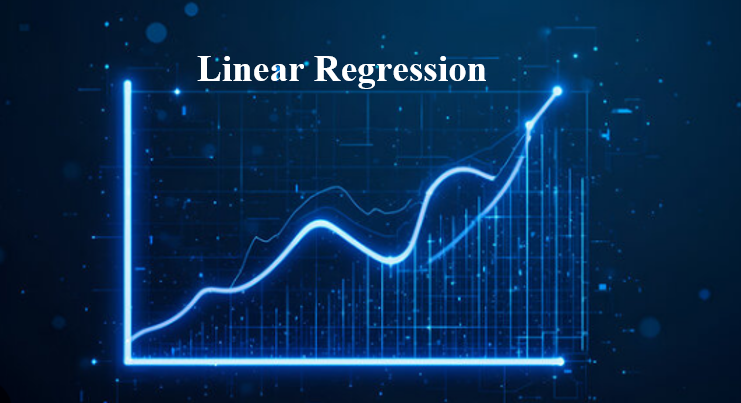

### **6.9 Linear Regression**

Same as the Random Forest, but a lot simpler as now I know how to adapt to this linear one. Also, take it from previous work.

In [79]:
# Linear Regression 
lr_model = LinearRegression()
lr_model.fit(X_train_rf, y_train_rf)

LinearRegression()

In [80]:
# Making predictions on the test set
y_pred_lr = lr_model.predict(X_test_rf)

# Evaluating the model
mse_lr = mean_squared_error(y_test_rf, y_pred_lr)
mae_lr = mean_absolute_error(y_test_rf, y_pred_lr)
r2_lr = r2_score(y_test_rf, y_pred_lr)

### 6.10 Printing The Result

In [81]:
print("Linear Regression Results")
print("")
print("MSE:", mse_lr)
print("MAE:", mae_lr)
print("R2:", r2_rf)

Linear Regression Results

MSE: 973.1878011000247
MAE: 24.947409378450935
R2: 0.7910825665986702


- I wasn’t totally sure if this would work the same way, but it seems to be giving me some numbers. Now, I just need to make sense of what these results actually mean and figure out if my model is doing a decent job and use another model to compare it.

#### **Understanding the Random Forest Results**

After I got these results earlier:

**MSE:** 457.2452115166667

**MAE:** 15.553526666666667

**R2:** 0.7910825665986702

I took a moment to really think about what they mean and went back to the same website where I had taken they from before. So, I found out that they’re common ways to measure how well my regression model is doing, each one showing a different part of the model’s performance like:

**Mean Squared Error (MSE) - 457.25**
MSE is a bit harsh to understand, and it really punishes big mistakes. It squares each error before averaging, so even a few large errors can push this number up a lot. My MSE of 457.25 means my predictions are quite a bit off on average, but without knowing more about my data, it’s hard to say exactly how bad this is...

**Mean Absolute Error (MAE) - 15.55**
MAE is a bit more nice. It just take the average of the absolute errors, like, without squaring them, so it’s easier to understand first. My MAE of 15.55 means what my predictions are, on average, about 15.55 thousand dollars off, a bit low than average. That number is usually easier to make sense of at this point.

**R-squared (R²) Score - 0.79**
Finally, there’s the (R²) score, which looks at the big picture as those two. But It tells me how much of the variation in my target variable (income) my model is explaining well. 
For exemple, with an R² of 0.79, my model is getting about 79% of the variation, which is a good start, but it also means there’s still 21% that it’s missing., and I am not sure how to fix that.

I found a really clear article that explains these metrics well, same were I took my code from: ***Essential Regression Evaluation Metrics:***  MSE, RMSE, MAE, R², and Adjusted R². 

It really helped me understand what these numbers mean, even though I dont fully understand them properly, but I believe I adapated well for this part, which brings me to the Plot Evaluation for both, even though I belive that at this time Random Forest might be the one, but lets give it a fair fight...



### **Comparing the Two Models**

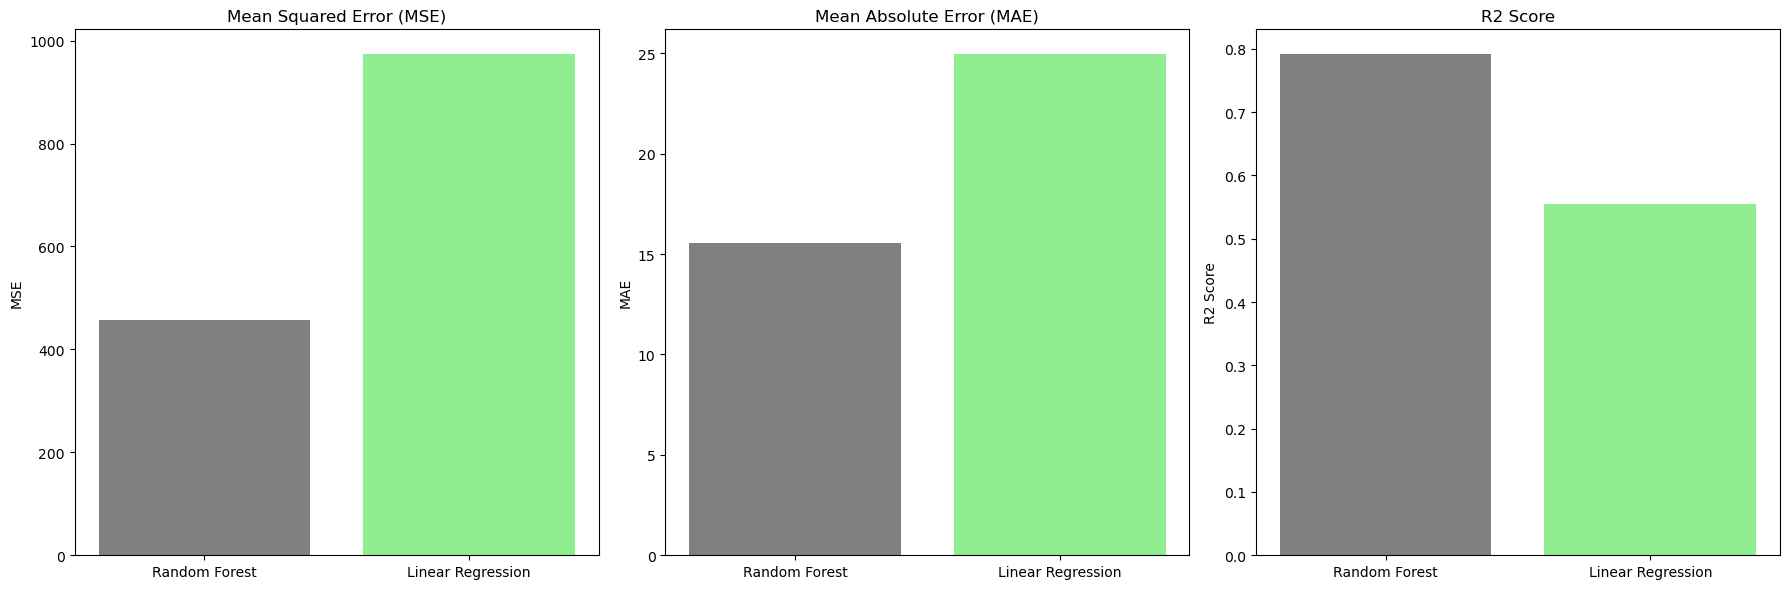

In [82]:
# Comparing the Two Models
models = ['Random Forest', 'Linear Regression']
mse_values = [mse_rf, mse_lr]
mae_values = [mae_rf, mae_lr]
r2_values = [r2_rf, r2_lr]

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.bar(models, mse_values, color=['grey', 'lightgreen'])
plt.title("Mean Squared Error (MSE)")
plt.ylabel("MSE")

plt.subplot(1, 3, 2)
plt.bar(models, mae_values, color=['grey', 'lightgreen'])
plt.title("Mean Absolute Error (MAE)")
plt.ylabel("MAE")

plt.subplot(1, 3, 3)
plt.bar(models, r2_values, color=['grey', 'lightgreen'])
plt.title("R2 Score")
plt.ylabel("R2 Score")

plt.tight_layout()
plt.show()



| **Metric** | **Random Forest** | **Linear Regression** |
| ---------- | ----------------- | --------------------- |
| **MSE**    | 457.25       | 973.19            |
| **MAE**    | 15.55         | 24.95             |
| **R2**     | 0.791         | 0.555             |



>### Summury 
> "Ealier, I found that the Random Forest model significantly outperformed the Linear Regression model in all the key metrics (MSE, MAE, R²). This made me realize that the relationships in my data are likely non-linear, which is where the more flexible and ensemble-based approach of Random Forest really shines. Given this, I decided to select the Random Forest model as my final choice for customer income prediction, as it provides a much more accurate and reliable result."


### 6.9 Checking the Columns
Here I do a quick check to make sure that the training and testing datasets have the same features. This is important in the machine learning because because if the features (columns) don’t match my model, that could give weird results I dont even know.

In [83]:
print("Train Columns:", X_train_rf.columns, "\n")

print("---------------------------------------------------\n")

print("Test Columns:", X_test_rf.columns, "\n")

Train Columns: Index(['Age', 'Experience(Years)', 'Sort Code', 'Family', 'Credit Score',
       'Mortgage(Thousands's)', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online Banking', 'CreditCard', 'Education_Degree',
       'Education_Diploma', 'Education_Masters'],
      dtype='object') 

---------------------------------------------------

Test Columns: Index(['Age', 'Experience(Years)', 'Sort Code', 'Family', 'Credit Score',
       'Mortgage(Thousands's)', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online Banking', 'CreditCard', 'Education_Degree',
       'Education_Diploma', 'Education_Masters'],
      dtype='object') 



## **7. New Customer Income Prediction** 

This part here it was one of the coolest part on this project because it really paid off all the work I had done previously.

Like, it was asked to create a object list of Customers for prediction based on the model I trained whihc I chose ***Random Forest*** for this task.

That was crucial for analysing the unseen data point out of the original I used. 

So, the idea was to create a ***"new customer"*** with features similar to those in the training data, but completely separate from it, which really put my model to the test. Lasllty, as per requirement I am using the same strucutre of the original data but simulating the unseen data with some realistic data to find out how the trained model performs with this data it wasnt trained.

### 7.1 My new unseen data

With random values to simulate them

In [84]:
### My new unseen data
new_customer = pd.DataFrame({
    'Age': [45],
    'Experience(Years)': [20],
    'Sort Code': [90089],
    'Family': [3],
    'Credit Score': [1.8],
    'Mortgage(Thousands\'s)': [0],
    'Personal Loan': [0],
    'Securities Account': [1],
    'CD Account': [0],
    'Online Banking': [1],
    'CreditCard': [0],
    'Education_Diploma': [1],
    'Education_Masters': [0],
    'Education_Degree': [0]
})

### 7.2 Using the same .columns FROM my original trained data for this new one

By doing that I makde sure that the new_customer DataFrame has the same columns in the same order for my training data.

In [85]:
# column order matches the training data
new_customer = new_customer[X_rf.columns]

### 7.3 Scaliing tHE New Customer

wHY this part is important? Because, when I need to scale the data the same way I did for my training and testing sets done earlier.

That alone, maintain the consistency with training since the model was trained by scaling, and to provide a fair fight and comparison the same scale must be used to get accurate predictions using the same model.

In [86]:
# Scaling the new customer data
new_customer_scaled = pd.DataFrame(
    scaler_rf.transform(new_customer),
    columns=new_customer.columns
)

### 7.4 Predicting the Income

Once the new customer data was scaled correclty, I did actualy the prediction on the income using the trained random forest model.

In [87]:
# Predicting the income
predicted_income = rf_model.predict(new_customer_scaled)

### 7.5 Printing Results

In [88]:
print("\nIncome Prediction for the New Customer:")
print({predicted_income[0]})


Income Prediction for the New Customer:
{54.84}


###  **Results Evaluation:**

When I predicted the income for this new customer now, the model returned 54.84, which I believe it means that was the expected from this customer, because he/she might earn around 54,840 dollars per year. This prediction is based on my models understanding of the patterns in the original training data I did earlier, where it learned how features like age, and experience, and credit score relate to income etc.

I believe this result is a fair estimation because it is not extremely high or low, which means the model might be working fine from the training data. 

Therefore, my model can make reasonable income predictions for unseen data points using this new customer as sample, thanks to the large amount of learning it did during the initial training phase, not only that but following:


> **Quick Note:** I am not really sure which class, I believe the second or thhird, where lecturer explained how the MACHINE LEARNING models work, at the time I wasnt 100% sure, by by doing this project, I have taken a lot of hands on experience and it is fascinating how everything comes together, because the entire work was done only for this small part in the end, and the theoretical part was really the FOUNDATION for this Trained Model Machine learning. BIG THANKS for not only the explation, but how they are explained is what makes a difference.

I honestly, hate data science stuff, but I suprised myself with the results and now, even though I continue studying programming, I keep this Science thing in the background because when we do the work, we can see what we are capable. 

***Which brings me to the next part of this assignment: Part 2: (Sentiment Analysis)***

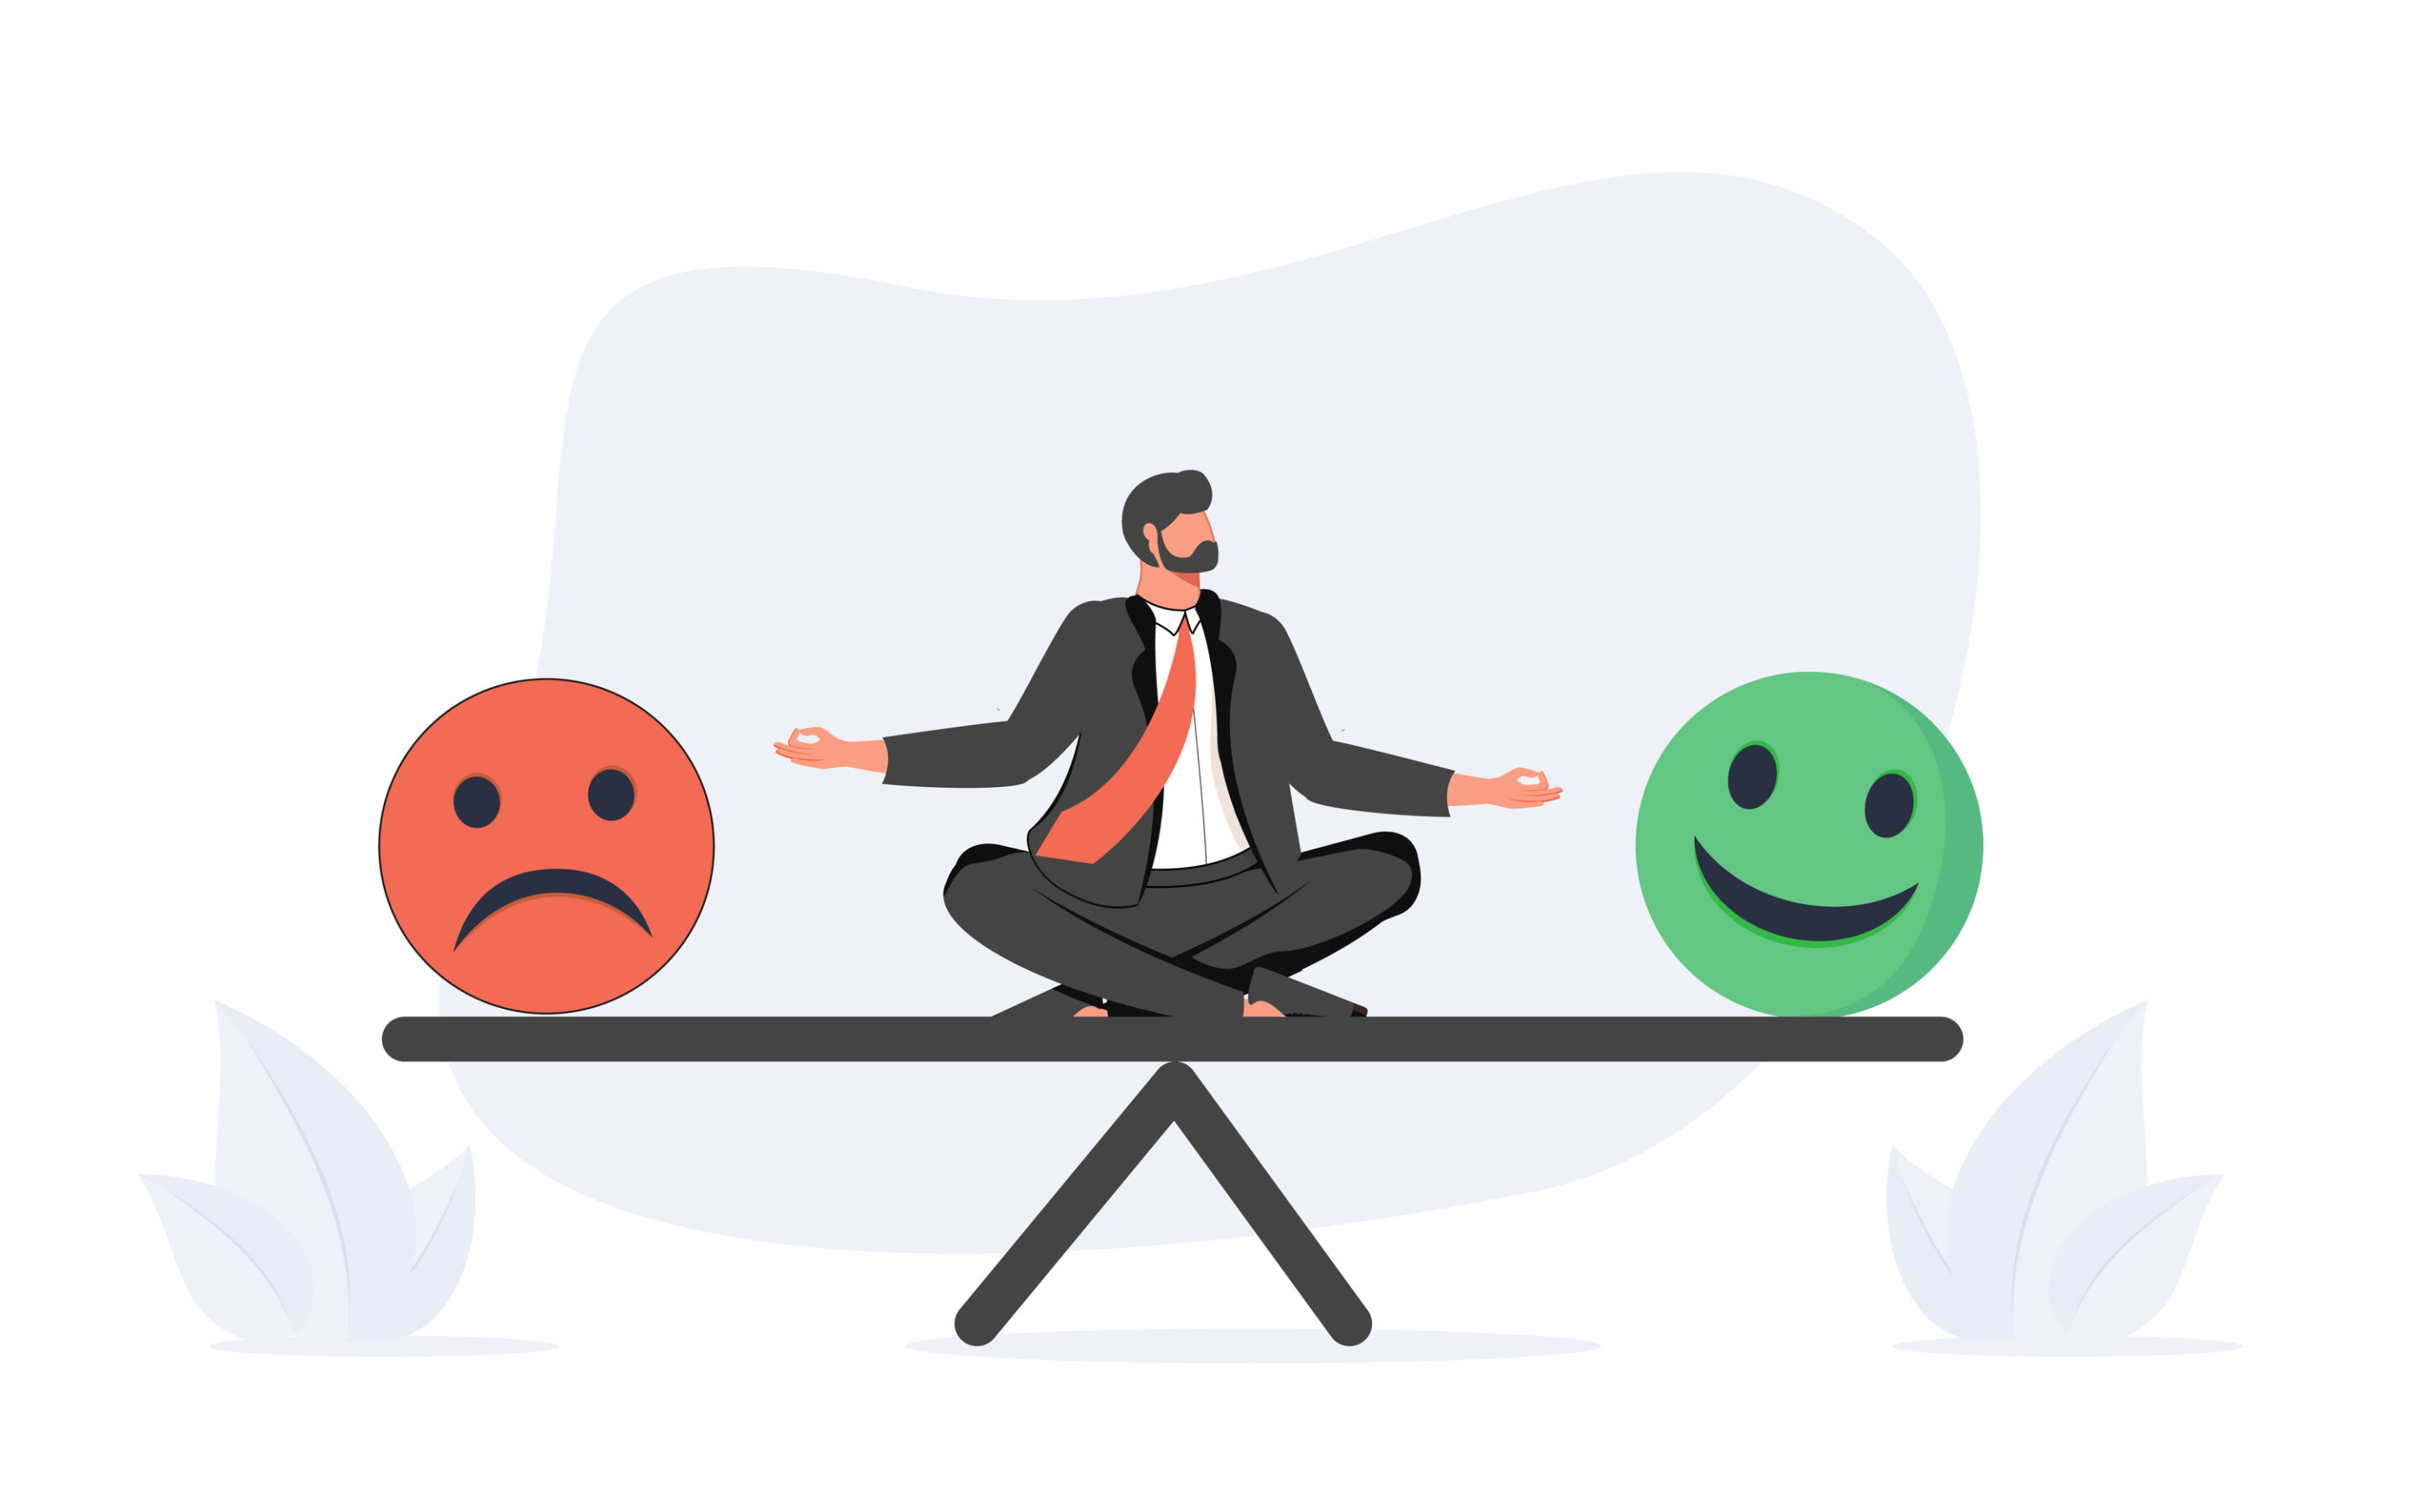

## **Part 2 - Sentiment Analysis on Company Reviews**
### 1 Environment Setup

Introduction to Sentiment Analysis
Before getting started with the code, I want to give an overview as to why I choose the Company Review topic. The reason is, since the last part from part 1 was about predicting Income per year. I thought about something I could relate, such as: **Company Reviews**. Which impacted on the dataset I choose for this part.

### 1.1 Introduction:

In this part, I am going to work on Sentiment Analysis, which is a method used in Natural Language Processing (NLP) to understand the emotions behind texts.

I am using the "Sentiment Analysis - Company Reviews" dataset from Kaggle, which contains around 100,000 reviews across 45 companies.

The main goal here is to predict the sentiment of each review as a star rating between 1 and 5.

I will use the VADER (Valence Aware Dictionary and sEntiment Reasoner) method for this, which is a great tool for quick sentiment analysis as it can handle social media text well, including slang, emojis, and negations.

> Dataset Link: https://www.kaggle.com/datasets/kazanova/sentiment140

#### **Challengins in Loading the dataset:**
I must tell that this part here was already challeging in loading the dataset. I used to following code:

In [89]:
# code to load the dataset used...

# file_path = r"C:\Users\STUDENT\Desktop\training.1600000.processed.noemoticon.csv"
# sentiment_df = pd.read_csv(file_path)
# print(sentiment_df.head())

- ***I got the following error:*** *UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 232719-232720: invalid continuation byte*


#### **Solution in Loading the Dataset:**

All I have to do was following the turotial from *SaturnCloud* website, that suggested I need to use *encoding format* as: **(encoding='ISO-8859-1')** which worked successsfully. I am also placing this link in the Reference part.


*https://saturncloud.io/blog/how-to-fix-the-pandas-unicodedecodeerror-utf8-codec-cant-decode-bytes-in-position-01-invalid-continuation-byte-error/*

### 1.3 Loading Dataset with (encoded)

In [90]:
import pandas as pd 

# Code with proper encoding
file_path = r"C:\Users\STUDENT\Desktop\training.1600000.processed.noemoticon.csv"
sentiment_df = pd.read_csv(file_path, encoding='ISO-8859-1')

### 1.4 Shape of the Dataset

In [91]:
# Checking shape of the dataset to understand the size
print("\nDataset Shape:")
print(sentiment_df.shape) 


Dataset Shape:
(1599999, 6)


### 1.5 Sample rows OF dataset and cheking import was successful 

In [92]:
# Displaying a sample of the dataset
print("\nSample of the Data:")
print(sentiment_df.head())  


Sample of the Data:
   0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY _TheSpecialOne_  \
0  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   scotthamilton   
1  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY        mattycus   
2  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         ElleCTF   
3  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          Karoli   
4  0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY        joy_wolf   

  @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  
0  is upset that he can't update his Facebook by ...                                                                   
1  @Kenichan I dived many times for the ball. Man...                                                                   
2    my whole body feels itchy and like its on fire                                                                    
3  @nationwideclass no, it's not behaving 

### 1.6 Understanding the Sample data above:

At first, I found really strange, then I found in this article in **DataCamp** website by *Moez ALL* THAT when understanding the classification for the analysis, renaming some columns are very important  for readability, also, because for further analysis for the sentiment stuff, we might not use some specific columns which I show next.

*https://www.datacamp.com/tutorial/text-classification-python*

### Renaming the columns

In [93]:
# Renaming columns for better understanding on the dataset further analysis
sentiment_df.columns = ["Sentiment", "ID", "Date", "Query", "Username", "Tweet"]

### Checking The Columns again

In [94]:
# Verify the changes
print("\nRenamed Columns:")
print("\n")

print(sentiment_df.head())


Renamed Columns:


   Sentiment          ID                          Date     Query  \
0          0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
1          0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
2          0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
3          0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4          0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY   

        Username                                              Tweet  
0  scotthamilton  is upset that he can't update his Facebook by ...  
1       mattycus  @Kenichan I dived many times for the ball. Man...  
2        ElleCTF    my whole body feels itchy and like its on fire   
3         Karoli  @nationwideclass no, it's not behaving at all....  
4       joy_wolf                      @Kwesidei not the whole crew   


> **Note:**  Now that I have named the columns, it is easy for me to identfy which column to drop to prepare the data more carefully for the **Sentiment Analysis** moving forward. 

### Justfying the Columns to Drop and "Why"

In order for me to prepare the dataset for ***sentiment analysis***, I need only the 'Sentiment' and 'Tweet' columns as per tutorial in the *NLTK Sentiment Analysis* by Moez ALL. 

That will help with the Analysis on the context part only, which is the part I need for this. The other part like: 'ID', 'Date', 'Query', and 'Username' is going to be removed as they dont help in anything.

This approach aligns with standard practices in text preprocessing for sentiment analysis.

### 1.7 Droping Unecessary Columns 

In [95]:
# Dropping unnecessary columns
sentiment_df.drop(["ID", "Date", "Query", "Username"], axis=1, inplace=True)

### Check the cleaned data

In [96]:
# Check the cleaned data
print("\nCleaned Data Sample:")
print(sentiment_df.head())


Cleaned Data Sample:
   Sentiment                                              Tweet
0          0  is upset that he can't update his Facebook by ...
1          0  @Kenichan I dived many times for the ball. Man...
2          0    my whole body feels itchy and like its on fire 
3          0  @nationwideclass no, it's not behaving at all....
4          0                      @Kwesidei not the whole crew 


- Now that those columns were dropped, I can focus entirely on the sentiment and tweet. Like mapping the columns for 0 and 1 and other things such as: **usernames**,**links**, **special characters and numbers** for both columns, *Sentiment and Tweet.*


## **2. Sentiment Mapping**

This information and tutorial is available in **Kagle** website where I took the *dataset* from:

*https://www.kaggle.com/datasets/kazanova/sentiment140*

- Which explain why we map the sentiment for context, where it explains that this process of using 0 and 4 as sentiment labels is a widely adopted convention in sentiment analysis, especially for Twitter data etc.

- That labeling approach is directly associated with the Sentiment140 dataset, which is one of the most commonly used resources for training sentiment analysis models, and that is what I will be doing next:

In [97]:
# Map sentiment values
sentiment_df['Sentiment'] = sentiment_df['Sentiment'].map({0: 'Negative', 4: 'Positive'})

# Check the distribution to confirm the change
print("\nSentiment Distribution:")
print(sentiment_df['Sentiment'].value_counts())


Sentiment Distribution:
Sentiment
Positive    800000
Negative    799999
Name: count, dtype: int64


### 2.1 Plotting and Analaysing the Sentiment Distribution

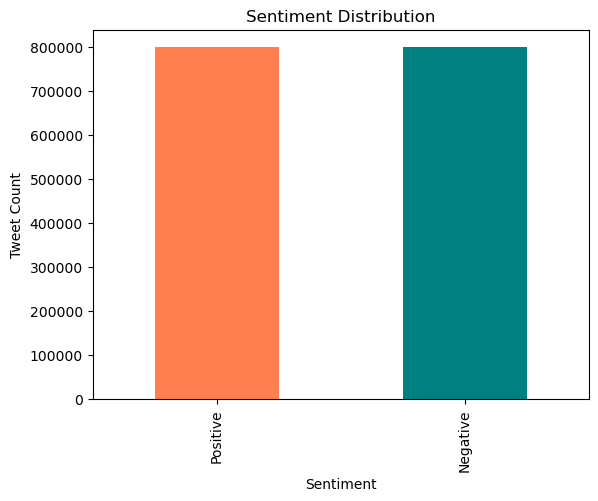

In [98]:
import matplotlib.pyplot as plt

# Plot the sentiment distribution
sentiment_df['Sentiment'].value_counts().plot(kind='bar', color=['coral', 'teal'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.show()

> "The dataset contains a nearly balanced distribution of positive and negative tweets as we see above, with 800,000 positive and 799,999 negative samples. That is very good balance because it is beneficial for building a sentiment analysis model, as it reduces the risk of class imbalance, which can bias the results when doing the analysis."

## **3. Text Processing**

I must say, this was the most challenging part of the project. At first, nothing worked. I tried different ways to clean the text, but I kept running into errors. I looked online, but it didn’t help much.

Then I remembered that there was a tutorial on Moodle, the Sentiment Analysis with Python document. I had completely forgotten about it. Once I opened it and looked at Step 2 - Preprocess Text (from the NLTK Sentiment Analysis section), everything started to make more sense.

I followed that guide carefully and used it to clean my tweets. This included:

- Removing stopwords like “and”, “the”, “is”

- Removing punctuation like @, #, !, and ...

- Making the text lowercase

- Filtering out extra characters that didn’t help with meaning

- After that, I created a new column called Clean_Tweet, and finally, the data looked ready for analysis.

> Even though it was difficult at first, I now understand how important text processing is before doing any kind of sentiment analysis.

In [99]:
import string
from nltk.corpus import stopwords

# Used the same function from the Tutorial Provided but changed the functions name only...
def clean_tweet(text):
 stpword = stopwords.words('english')
 no_punctuation = [char for char in text if char not in
string.punctuation]
 no_punctuation = ''.join(no_punctuation)
 return ' '.join([word for word in no_punctuation.split() if
word.lower() not in stpword]) 

### 3.1 Checking the Results of the Pre-processing

After finishing the text cleaning step, I decided to limit the dataset to 10,000 rows. The project asked for at least 1,000 observations, but I originally tried to use the full dataset, which has about 1.6 million tweets.

However, when I tried to process everything, it took a lot of time and made my notebook slow. Because of that, I chose to work with a smaller sample of 10,000 tweets, which still gave me a good amount of data for analysis.

> Even though I used only part of the dataset, it was enough to show how the sentiment analysis works, and it made the processing much faster and easier to manage.

In [100]:
# Apply on a small sample first
sample_df = sentiment_df.head(10000).copy()
sample_df['Clean_Tweet'] = sample_df['Tweet'].apply(clean_tweet)

# Check result
print(sample_df[['Tweet', 'Clean_Tweet']].head())

                                               Tweet  \
0  is upset that he can't update his Facebook by ...   
1  @Kenichan I dived many times for the ball. Man...   
2    my whole body feels itchy and like its on fire    
3  @nationwideclass no, it's not behaving at all....   
4                      @Kwesidei not the whole crew    

                                         Clean_Tweet  
0  upset cant update Facebook texting might cry r...  
1  Kenichan dived many times ball Managed save 50...  
2                   whole body feels itchy like fire  
3           nationwideclass behaving im mad cant see  
4                                Kwesidei whole crew  


### 3.2 Cleaning Results
After running the text cleaning, I checked the results, and yep, it actually worked...

I see that all the @ mentions, punctuation, and small words like "the" or "and" were removed. The tweets look much simpler now, just the important words are left as per turorial.

- Tweet 0: went from “is upset that he can't update his Facebook...”
to → “upset cant update Facebook texting might cry”

- Tweet 1: “@Kenichan I dived many times...”
to → “Kenichan dived many times ball Managed save...”

> So, the cleaning did what it was supposed to do at this stage. Now the tweets are much easier to analyze with VADER moving forawrd..

### **4. Setting Up the Sentiment Analyzer (VADER)**

Before I could analyze the tweets, I needed to import and set up VADER, which is a tool made for understanding the sentiment (feeling) of text etc.
Like if it’s positive, negative, or neutral.

The code below imports ***VADER*** from the nltk library,and creates an analyzer object that I can use FOR Sentiment Analysis, where the hear of this parts starts to beat strong for each tweet.

In [101]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon') # tHIS will download its library for it

# Initializing the VADER sentiment analyzer as OBJECT...
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\STUDENT\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### 4.1 Creating a Function to Label the Sentiment
The **VADER** gives a compound score for each tweet that's a number between -1 and +1 that shows how positive or negative the text is for every text.

But, for my project, I didn’t just want THE numbers, I also wanted to turn those scores into labels like “Positive”, “Negative”, or “Neutral” so it’s easier to read and understand, and interpreting them in the plot after that.

In [102]:
# This function will convert compound score to a label like promised.
def get_sentiment(score):
    if score >= 0.05:
        return 'Positive' ## Just added for fun (Positive)
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

### 4.2 Applying VADER to the Tweets
After setting up the VADER tool and writing the function to label the sentiment, I used it on my cleaned tweets.

I first got the compound score using VADER’s polarity_scores() method. Then, I used my get_sentiment() function to turn that score into a label like Positive, Negative, or Neutral.

In [103]:
# Apply VADER to the cleaned tweet text
sample_df['VADER_Score'] = sample_df['Clean_Tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
sample_df['VADER_Sentiment'] = sample_df['VADER_Score'].apply(get_sentiment)

### 4.3 Results

Here is where the magic begins, after applying VADER to the tweets, I wanted to check if everything worked properly... So, I printed out the first few rows to see the original tweet, the cleaned version, the VADER score, and also the final sentiment label.

In [104]:
# Preview the result
sample_df[['Tweet', 'Clean_Tweet', 'VADER_Score', 'VADER_Sentiment']].head()

,Tweet,Clean_Tweet,VADER_Score,VADER_Sentiment
0,is upset that he can't update his Facebook by ...,upset cant update Facebook texting might cry r...,-0.7269,Negative
1,@Kenichan I dived many times for the ball. Man...,Kenichan dived many times ball Managed save 50...,0.4939,Positive
2,my whole body feels itchy and like its on fire,whole body feels itchy like fire,-0.2500,Negative
3,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving im mad cant see,-0.4939,Negative
4,@Kwesidei not the whole crew,Kwesidei whole crew,0.0000,Neutral


**Analysing the results:** Well, looking at the first few results, I can say that VADER worked quite well as displayed...

- Like, the first tweet talks about someone being upset and crying, and it got a Negative score of -0.72, which makes sense.

-  Another tweet about diving and saving the ball got a Positive score, which also is a good tone, being Positive.

- There’s also a Neutral tweet that just says “not the whole crew,” which doesn’t show any strong emotion like the others, so the 0.00 score feels accurate then for this part.

Overall, I believe the scores and labels match the tweet content quite well, and it gave me more confidence in using VADER for this task. Nex, I will plot the sentiment Distribution for this 10000 tweets.

### 4.4 Plotting Results

To better understand the overall results I got, I created a bar chart showing how many tweets were labeled as Positive, Negative, or Neutral by VADER as follows.

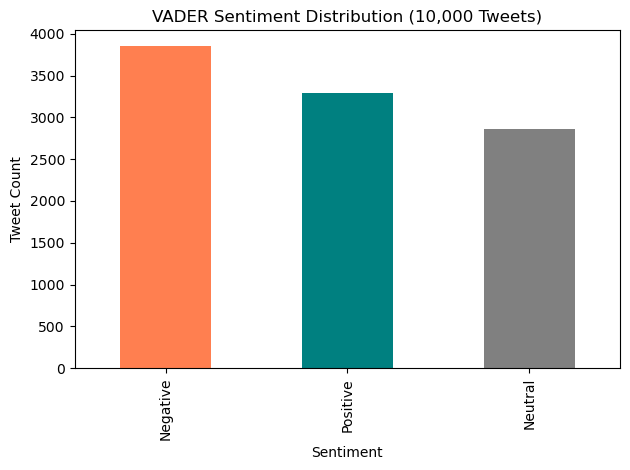

In [105]:
import matplotlib.pyplot as plt

sample_df['VADER_Sentiment'].value_counts().plot(kind='bar', color=['coral', 'teal', 'gray'])
plt.title('VADER Sentiment Distribution (10,000 Tweets)')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.tight_layout()
plt.show()

<br/><br/>

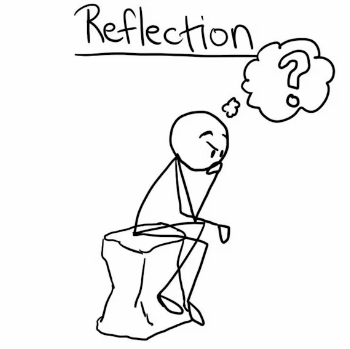

## **Final Sentiment Check (Reflection)**
After cleaning and fixing up a set of 10,000 tweets, I used a tool called VADER to check the mood (sentiment) of each one. VADER works well with social media because it understands things like slang, emojis, and when someone says the opposite of what they mean (like "not happy").

The results looked pretty normal, a mix of positive, neutral, and negative tweets. For example, tweets that said stuff like "upset", "mad", or "fire" (in a bad way) had low scores, under -0.5. Tweets with good vibes like "Managed to save" scored high, around +0.5. VADER’s score system made it easier to sort each tweet into the right mood group.

**My Thoughts**
Honestly, this part wasn’t easy for me. I had a few problems, especially when cleaning the text. Sometimes the data wouldn’t load right, or I forgot to use the right function on the correct dataset. Also, I didn’t really get how VADER worked at first or what the scores meant.

> *But after watching a few tutorials (like the ones on Moodle and DataCamp), things started to make more sense. I managed to clean the tweets, run the tool, and understand the results. It took a lot of tries, but in the end, I’m proud of what I did. I now get how NLP and sentiment analysis work a lot better, and I feel more confident using Python for this kind of stuff.*


# **References**

---

### Class Materials

- **Sentiment Analysis with Python NLP Tutorial File**  
- **Sentiment Analysis Tutorial File**  
- **Clothing Review File**  
- **Sentiment Analysis Lexicon-Based File**  
- **Sentiment File (.ipynb)**  
- **Sentiment Analysis Lexicon-Based File (duplicate)**  

---

### Official Documentation

<div style="background-color:#f8f9fa; padding:12px; border-left:4px solid #17a2b8; border-radius:8px; margin-bottom:20px;">

- 📖 <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html" target="_blank">Pandas: DataFrame.info()</a>  
  Pandas (2025). *pandas.DataFrame.info - pandas documentation*. [Accessed 10 May 2025].

- 📖 <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html" target="_blank">Scikit-learn: train_test_split</a>  
  Scikit-learn (2025). *train_test_split — Scikit-learn documentation*. [Accessed 16 May 2025].

- 📖 <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html" target="_blank">Scikit-learn: RandomForestRegressor</a>  
  Scikit-learn (2025). *RandomForestRegressor — documentation*. [Accessed 17 May 2025].

- 📖 <a href="https://keras.io/api/callbacks/early_stopping/" target="_blank">Keras: EarlyStopping API</a>  
  Keras (2025). *EarlyStopping*. [Accessed 17 May 2025].

- 📖 <a href="https://www.tensorflow.org/guide/keras/sequential_model" target="_blank">TensorFlow: Keras Sequential Model Guide</a>  
  TensorFlow (2025). *Sequential Model*. [Accessed 17 May 2025].

</div>


###  Tutorials & Articles

<div style="background-color:#fff9e6; padding:12px; border-left:4px solid #ffc107; border-radius:8px; margin-bottom:20px;">

- 🎓 <a href="https://www.datacamp.com/tutorial/random-forests-classifier-python" target="_blank">DataCamp: Random Forest Tutorial</a>  
  DataCamp (2023). *Random forests classifier in Python*. [Accessed 19 May 2025].

- 🎓 <a href="https://www.datacamp.com/tutorial/text-classification-python" target="_blank">DataCamp: Text Classification with NLTK</a>  
  DataCamp (2022). *Text classification in Python*. [Accessed 19 May 2025].

- 🎓 <a href="https://medium.com/@piyushkashyap045/early-stopping-in-deep-learning-a-simple-guide-to-prevent-overfitting-1073f56b493e" target="_blank">Medium: Early Stopping in Deep Learning</a>  
  Kashyap, P. (2022). *A simple guide to prevent overfitting*. [Accessed 17 May 2025].

- 🎓 <a href="https://saturncloud.io/blog/how-to-fix-the-pandas-unicodedecodeerror-utf8-codec-cant-decode-bytes-in-position-01-invalid-continuation-byte-error/" target="_blank">Saturn Cloud: Fixing Pandas UnicodeDecodeError</a>  
  Saturn Cloud (n.d.). *Solution for encoding errors when loading CSVs*. [Accessed 19 May 2025].

- 🎓 <a href="https://www.datacamp.com/tutorial/text-analytics-beginners-nltk" target="_blank">DataCamp: Text Analytics for Beginners with NLTK</a>  
  DataCamp (2022). *NLTK basics for text processing*. [Accessed 19 May 2025].

</div>



### 💡 Stack Overflow & Community Insights

- 💬 <a href="https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python" target="_blank">Stack Overflow: One-hot Encoding</a>  
  Stack Overflow (2016). *How can I one-hot encode in Python?* [Accessed 13 May 2025].

- 💬 <a href="https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracy" target="_blank">Keras: Plot Accuracy</a>  
  Stack Overflow (2017). *Training, validation, and test accuracy plots*. [Accessed 17 May 2025].


###  Dataset Sources

<div style="background-color:#e3fcef; padding:12px; border-left:4px solid #28a745; border-radius:8px;">

- 📊 <a href="https://www.kaggle.com/datasets/kazanova/sentiment140" target="_blank">Kaggle: Sentiment140 Dataset</a>  
  Kaggle (n.d.). *Tweets labeled with sentiment*. [Accessed 19 May 2025].

</div>



### YouTube Tutorial

<div style="background-color:#e8f4fd; padding:16px; border-left:5px solid #2c82c9; border-radius:10px; margin-top:20px;">

### Sentiment Analysis - Full Tutorial

<b>Video Title:</b> Sentiment analysis tutorial video  
<b>Link:</b>   <a href="https://www.youtube.com/watch?v=XPXihYEhemk&list=LL&index=2" target="_blank">
Watch on YouTube
</a>  
<small style="color:gray;">YouTube (n.d.). [Accessed 20 May 2025]</small>

</div>


<br/>


<div style="background-color:#f6f6f6; padding:15px; border-left:5px solid #c53c38; border-radius:10px">
    
## 🎥 *Optional Project Presentation*

Although a presentation was **not required** for this project, I decided to record a full walkthrough of my notebook and results as a personal challenge and a way to finish strong.

🔗 **Presentation Video Link**:  
    https://drive.google.com/file/d/1SHQz1K7P8UFk0uEVbfZ2O9SdVeLCAB6a/view?usp=drive_link

</div>


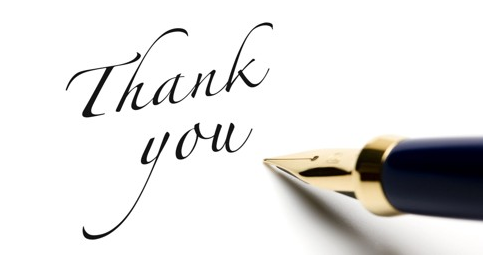